In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Course_Material/Python_codes/Multi_linear_regression/cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


Correlation:             HP       MPG       VOL        SP        WT
HP   1.000000 -0.725038  0.077459  0.973848  0.076513
MPG -0.725038  1.000000 -0.529057 -0.687125 -0.526759
VOL  0.077459 -0.529057  1.000000  0.102170  0.999203
SP   0.973848 -0.687125  0.102170  1.000000  0.102439
WT   0.076513 -0.526759  0.999203  0.102439  1.000000


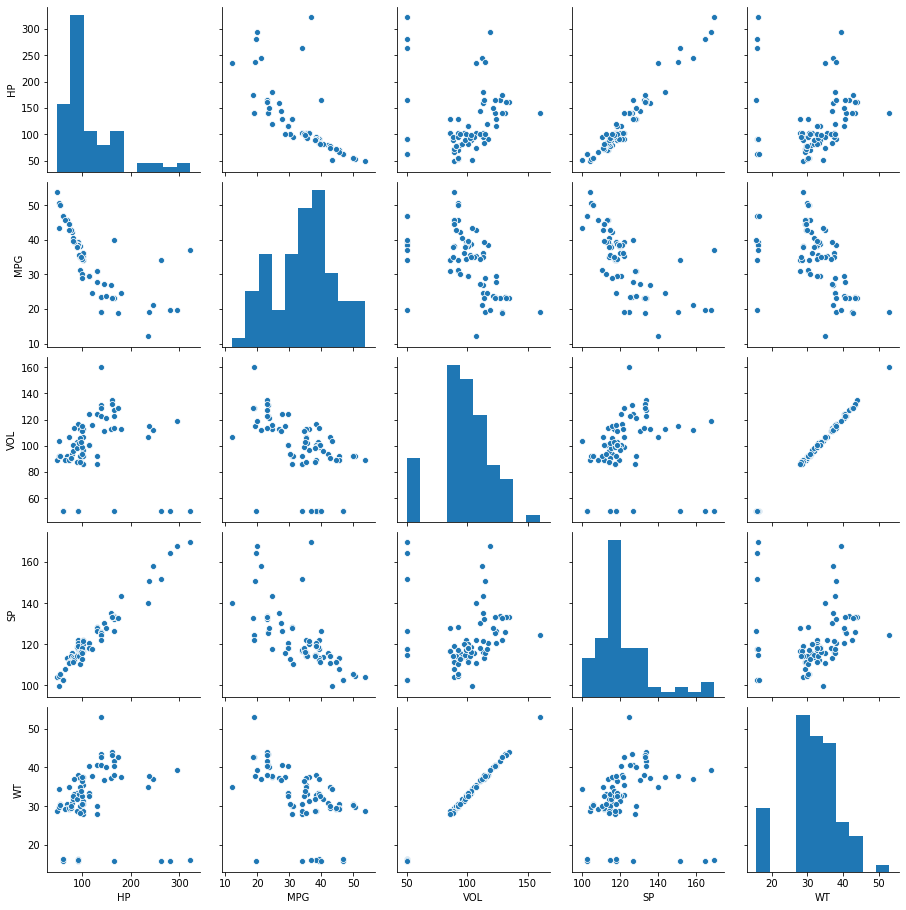

In [3]:
# Correlation matrix to identify auto correlation
print("Correlation: ",cars.corr()) 

# Visually identifing Auto Correlation
import seaborn as sns
sns.pairplot(cars)
plt.show()

In [5]:
# Create regression model - without treating autocorrelation
import statsmodels.formula.api as smf
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit() 
print(model1.summary())

model1_pred = model1.predict(cars)
model1_error = model1_pred - cars.MPG
print("RMSE Value of Model 1 is: ", np.sqrt(np.mean(model1_error*model1_error)))

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.54e-23
Time:                        19:54:00   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.0

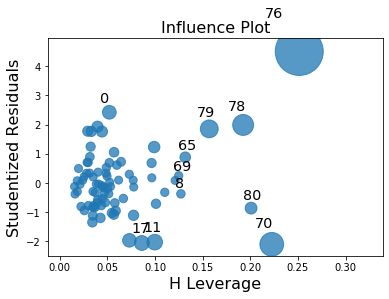

In [6]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [7]:
cars_new=cars.drop(cars.index[[76,78]],axis=0)

model1_new=smf.ols('MPG~WT+VOL+SP+HP',data=cars_new).fit()
print(model1_new.summary())
model1_new_pred = model1_new.predict(cars_new)
model1_new_error = model1_new_pred - cars_new.MPG
print("RMSE Value of Model1_New is: ", np.sqrt(np.mean(model1_new_error*model1_new_error)))

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.76e-29
Time:                        19:55:28   Log-Likelihood:                -212.89
No. Observations:                  79   AIC:                             435.8
Df Residuals:                      74   BIC:                             447.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3964     12.506      1.551      0.1

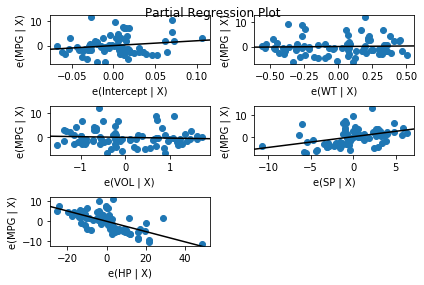

In [11]:
# Plot partial regression plot for identifying impact of each features 
sm.graphics.plot_partregress_grid(model1_new)
plt.show()

In [8]:
"""based on partial regression plt we can say that weight and Volume has minimum impact
   hence we will try to build a model by droping WEIGHT, then VOLUME and later both.
   We will have 3 final model""" 

# 1st final model by droping Volume

Final_model1 = smf.ols('MPG~WT+SP+HP',data=cars_new).fit() 
print(Final_model1.summary())

Final_model1_pred = Final_model1.predict(cars_new)
Final_model1_error = Final_model1_pred - cars_new.MPG
print("RMSE Value of Final Model 1 is: ", np.sqrt(np.mean(Final_model1_error*Final_model1_error)))



                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.65e-30
Time:                        19:56:20   Log-Likelihood:                -213.08
No. Observations:                  79   AIC:                             434.2
Df Residuals:                      75   BIC:                             443.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8457     12.194      1.463      0.1

In [9]:
# 2nd final model by droping Weight

Final_model2 = smf.ols('MPG~VOL+SP+HP',data=cars_new).fit() 
print(Final_model2.summary())

Final_model2_pred = Final_model2.predict(cars_new)
Final_model2_error = Final_model2_pred - cars_new.MPG
print("RMSE Value of Final Model 2 is: ", np.sqrt(np.mean(Final_model2_error*Final_model2_error)))

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.43e-30
Time:                        19:56:50   Log-Likelihood:                -212.93
No. Observations:                  79   AIC:                             433.9
Df Residuals:                      75   BIC:                             443.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6539     12.182      1.531      0.1

In [10]:
# 3rd final model by droping Weight & Volume

Final_model3 = smf.ols('MPG~SP+HP',data=cars_new).fit() 
print(Final_model3.summary())

Final_model3_pred = Final_model3.predict(cars_new)
Final_model3_error = Final_model3_pred - cars_new.MPG
print("RMSE Value of Final Model 3 is: ", np.sqrt(np.mean(Final_model3_error*Final_model3_error)))


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 03 May 2020   Prob (F-statistic):           2.69e-23
Time:                        19:57:05   Log-Likelihood:                -233.26
No. Observations:                  79   AIC:                             472.5
Df Residuals:                      76   BIC:                             479.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7339     15.569      0.625      0.5